In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants as con
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

Assume two particle particle one has a mass of $m_1$, and the other with much smmaller mass of $m_2$

In [102]:
m2 = 1.00784 * con.u # He mass
m1 = 100 * m2
omega = 2 * np.pi * 0.5
k = omega**2 * m1

def v1(t, amp=1):
    return - amp * omega * np.sin(omega * np.random.rand())

def v2_after(v1, v2):
    """Final velocity of particle 2 after collision
    with particle 1."""
    return 2*m1 / (m1+m2) * v1 - (m1-m2) / (m1+m2) * v2

def temp(v):
    return m2 * v**2 / (3 * con.k)

Avg energy is 1.6761850970277765e-05 eV
Total energy is 0.00012886650588822158 eV


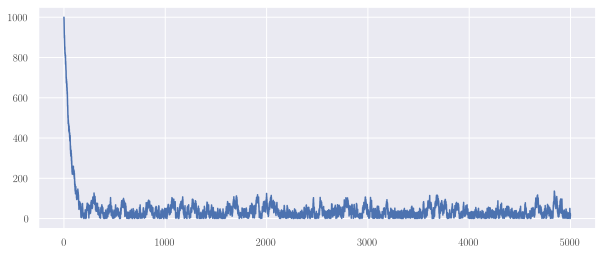

In [118]:
steps = 5000
A = 5
velocities = np.zeros(steps)
time = np.arange(steps)
# initial speed
velocities[0] = 1000

for i in time[1:]:
    velocities[i] = v2_after(v1(i, A), velocities[i-1])

avg_speed = abs(velocities[300:]**2).sum() / len(velocities[300:])
print(f'Avg energy is {m2 * velocities[300:].var() / con.e} eV')
print(f'Total energy is {0.5* k*A**2 / con.e} eV')

plt.plot(time, abs(velocities))
plt.show()

In [117]:
(m2 * velocities[300:].var()) - (0.5* k*A**2)

-1.727565702647578e-23

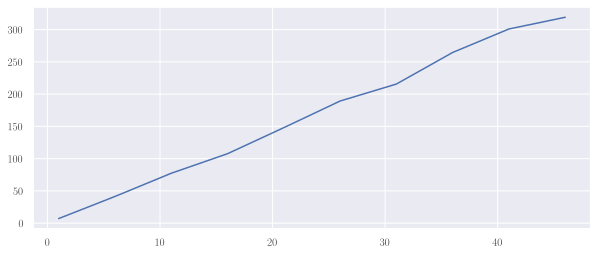

In [95]:
amps = np.arange(1, 50, 5)
variances = []
for amp in amps:
    for i in time[1:]:
        velocities[i] = v2_after(v1(i, amp), velocities[i-1])
    variances.append(velocities[300:].var())

plt.plot(amps, [np.sqrt(x) for x in variances])
plt.show()